In [1]:
import os
os.environ['TF_ENABLE_ONEDNN_OPTS'] = "0"
import tensorflow as tf


print("Tensorflow version :-" , tf.__version__)
print("GPU's available :-" , tf.config.list_physical_devices("GPU"))





Tensorflow version :- 2.18.0
GPU's available :- []


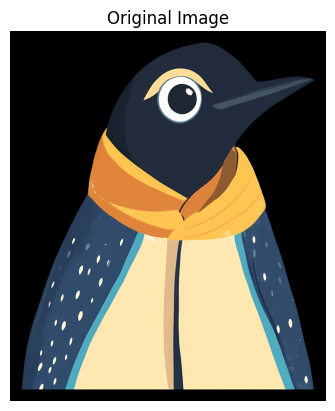

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread("dataset/penguin.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR (OpenCV) to RGB

plt.imshow(image)
plt.axis("off")
plt.title("Original Image")
plt.show()


C:\Users\Sam\AppData\Local\Temp\ipykernel_25968\4015068214.py:22: UserWarning: Argument(s) 'var_limit' are not valid for transform GaussNoise
  ("gauss_noise", A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)),
C:\Users\Sam\AppData\Local\Temp\ipykernel_25968\4015068214.py:24: UserWarning: Argument(s) 'quality_lower, quality_upper' are not valid for transform ImageCompression
  ("jpeg_compression", A.ImageCompression(quality_lower=20, quality_upper=50, p=1.0)),


Saved: dataset/augmented/motion_blur.png
Saved: dataset/augmented/gaussian_blur.png
Saved: dataset/augmented/defocus.png
Saved: dataset/augmented/gauss_noise.png
Saved: dataset/augmented/brightness.png
Saved: dataset/augmented/jpeg_compression.png
Saved: dataset/augmented/perspective.png


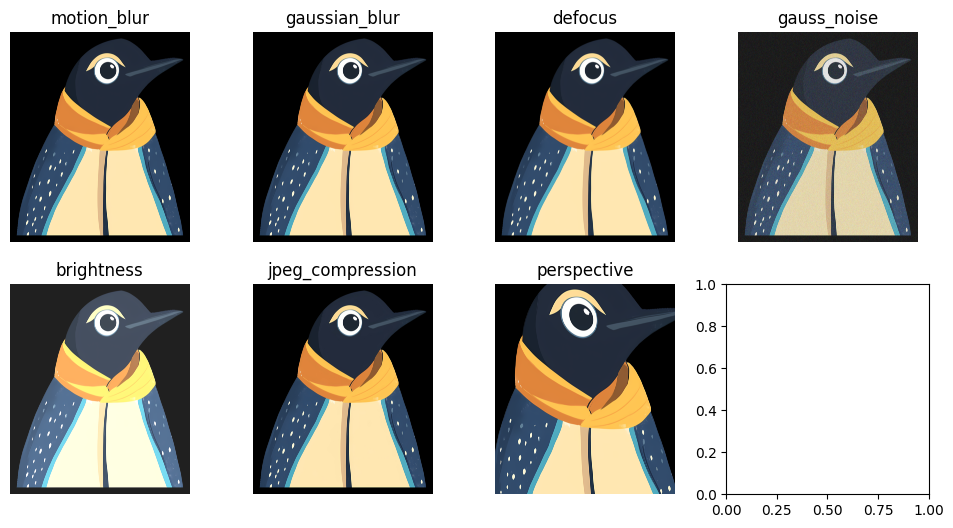

In [ ]:
import cv2
import numpy as np
import albumentations as A
import matplotlib.pyplot as plt
import os   

# Create directory for augmented images
output_dir = "dataset/augmented/"
os.makedirs(output_dir, exist_ok=True)

# Load original image
image_path = "dataset/penguin.png"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB

# Define augmentations
augmentations = [
    ("motion_blur", A.MotionBlur(blur_limit=7, p=1.0)),
    ("gaussian_blur", A.GaussianBlur(blur_limit=(3, 7), p=1.0)),
    ("defocus", A.Defocus(radius=(3, 7), p=1.0)),
    ("gauss_noise", A.GaussNoise(var_limit=(10.0, 50.0), p=1.0)),
    ("brightness", A.RandomBrightnessContrast(brightness_limit=0.3, contrast_limit=0.3, p=1.0)),
    ("jpeg_compression", A.ImageCompression(quality_lower=20, quality_upper=50, p=1.0)),
    ("perspective", A.Perspective(scale=(0.02, 0.1), p=1.0))
]

# Apply and save augmented images
for name, transform in augmentations:
    augmented = transform(image=image)["image"]
    save_path = os.path.join(output_dir, f"{name}.png")
    cv2.imwrite(save_path, cv2.cvtColor(augmented, cv2.COLOR_RGB2BGR))
    print(f"Saved: {save_path}")

# Display samples
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
for idx, (name, _) in enumerate(augmentations):
    augmented_img = cv2.imread(os.path.join(output_dir, f"{name}.png"))
    augmented_img = cv2.cvtColor(augmented_img, cv2.COLOR_BGR2RGB)
    axes[idx // 4, idx % 4].imshow(augmented_img)
    axes[idx // 4, idx % 4].set_title(name)
    axes[idx // 4, idx % 4].axis("off")

plt.show()
